In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/gzdekzlkaya/pima-indians-diabetes-dataset/pima_diabetes_data.csv


# Diabetes Prediction using Machine Learning

## Problem Statement
The objective of this project is to predict whether a patient has diabetes based on medical diagnostic measurements.

## Dataset
Pima Indians Diabetes Dataset

## Target Varibale
Outcome:
- 0-> Non-Diabetic
- 1-> Diabetic

In [18]:
path='/kaggle/input/datasets/gzdekzlkaya/pima-indians-diabetes-dataset/pima_diabetes_data.csv'

In [145]:
df=pd.read_csv(path)

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df.shape

(768, 9)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Dataset Overview
- The dataset contains 78 records.
- There are 8 medical predictor variables and 1 target variable (Outcome).
- All features are numerical.

In [24]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
(df==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [70]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [147]:
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [148]:
for col in cols:
    df[col]=df[col].replace(0,np.nan)

In [131]:
from sklearn.impute import SimpleImputer

In [151]:
imputer= SimpleImputer(strategy='median')
cols=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
df[cols]=imputer.fit_transform(df[cols])

In [152]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Handling Missing Values 
Zero values in medical features were treated as missing values.
Missing values were handled using median imputation to avoid the effect of outliers.

In [78]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [47]:
import seaborn as sns 
import matplotlib.pyplot as plt

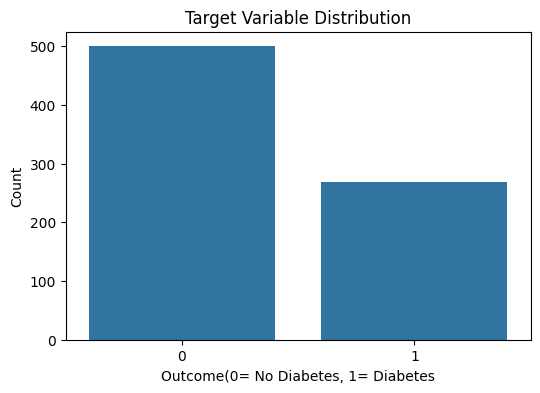

In [79]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['Outcome'])
plt.title("Target Variable Distribution")
plt.xlabel("Outcome(0= No Diabetes, 1= Diabetes")
plt.ylabel("Count")
plt.show()

### Target Variable Analysis
- The dataset contains more non-diabetic cases (0) than diabetic cases (1).
- The data is moderately imbalanced but not severely skewed.
- This imbalance should be considered during model evalution. 

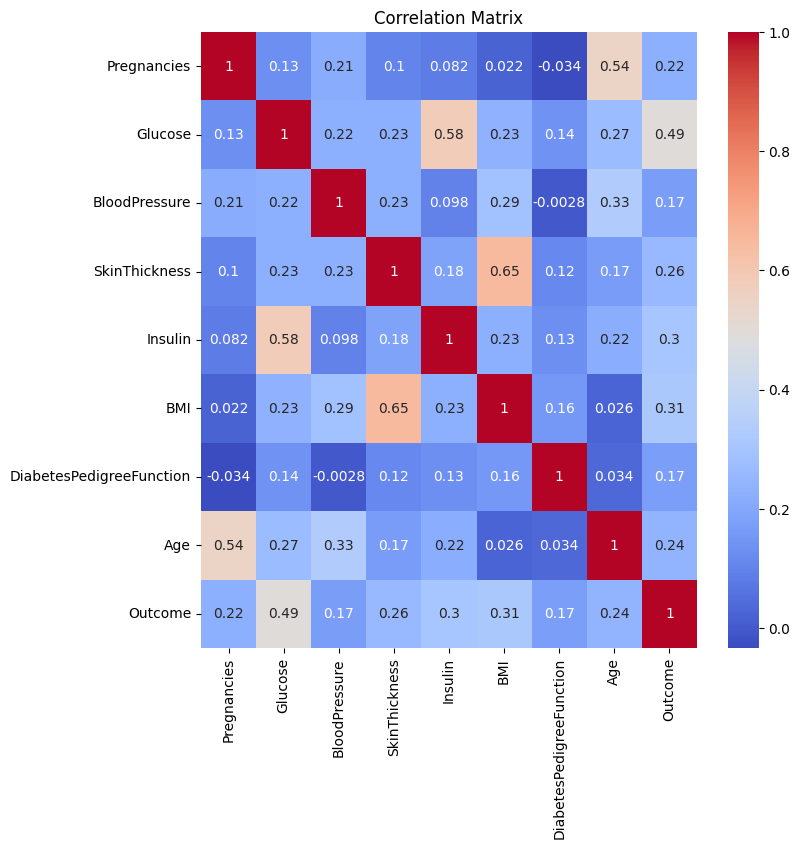

In [89]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

### Correlation Analysis
Glucose shows the highest positive correlation (0.49) with diabetes.
BMI (0.31) and Insulin (0.30) also show moderate correlation.
Others features show weak correlation withn the target variable.

In [99]:
df.columns=df.columns.str.strip()

In [160]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [106]:
print("Features shape:",X.shape)
print("Target shape:",y.shape)

Features shape: (768, 8)
Target shape: (768,)


In [161]:
from sklearn.model_selection import train_test_split

In [168]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [169]:
X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [171]:
from sklearn.preprocessing import StandardScaler

In [173]:
scaler= StandardScaler()

In [175]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [177]:
from sklearn.linear_model import LogisticRegression

In [179]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [180]:
y_pred=model.predict(X_test)

In [189]:
print(y_pred)

[1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0]


In [190]:
comparison=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
print(comparison.head(10))

     Actual  Predicted
44        0          1
672       0          0
700       0          0
630       1          0
81        0          0
389       0          0
387       1          0
408       1          1
163       0          0
335       0          1


In [192]:
y_prob=model.predict_proba(X_test)
print(y_prob[:10])

[[0.39028927 0.60971073]
 [0.88164424 0.11835576]
 [0.70653687 0.29346313]
 [0.7491633  0.2508367 ]
 [0.96679333 0.03320667]
 [0.83147615 0.16852385]
 [0.5118357  0.4881643 ]
 [0.07632489 0.92367511]
 [0.91856595 0.08143405]
 [0.1614104  0.8385896 ]]


In [181]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [193]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.7077922077922078

Confusion Matrix:
 [[82 18]
 [27 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [196]:
model= LogisticRegression(max_iter=1000, class_weight='balanced')

In [201]:
class_weight='balanced'

In [202]:
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [203]:
y_pred= model.predict(X_test)

In [204]:
print(y_pred)

[1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1
 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1
 1 0 0 0 1 0]


In [209]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion_Matrix:", confusion_matrix(y_test, y_pred))
print("Classification_Report:", classification_report(y_test, y_pred))

Accuracy: 0.7337662337662337
Confusion_Matrix: [[75 25]
 [16 38]]
Classification_Report:               precision    recall  f1-score   support

           0       0.82      0.75      0.79       100
           1       0.60      0.70      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



In [194]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred_rf))
print("Confusion_matrix:",confusion_matrix(y_test, y_pred_rf))
print("Classification_report:",classification_report(y_test, y_pred_rf))

Accuracy: 0.7792207792207793
Confusion_matrix: [[87 13]
 [21 33]]
Classification_report:               precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



In [208]:
rf= RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf= rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion_Matrix:", confusion_matrix(y_test, y_pred_rf))
print("Classification_Report:",classification_report(y_test, y_pred_rf))

Accuracy: 0.7402597402597403
Confusion_Matrix: [[84 16]
 [24 30]]
Classification_Report:               precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



### Final Conclusion
After performing EDA, handling missing values, scaling features, and training multiple models, Balanced Logistic Regression performed best with 77.9% accuracy and 61% recall for diabetic patients.

Since recall is critical in medical diagnosis problems, the balanced Logistic Regression model was selected as the final model.

In [210]:
from sklearn.metrics import roc_curve, roc_auc_score

In [212]:
import matplotlib.pyplot as plt

In [214]:
print(model)

LogisticRegression(class_weight='balanced', max_iter=1000)


In [215]:
LogisticRegression(...)

LogisticRegression(penalty=Ellipsis)

In [228]:
y_prob= model.predict_proba(X_test)

In [229]:
print(y_prob[:5])

[[0.26678403 0.73321597]
 [0.78814787 0.21185213]
 [0.56067861 0.43932139]
 [0.61729733 0.38270267]
 [0.94574389 0.05425611]]


In [239]:
y_prob= model.predict_proba(X_test)[:, 1]

In [240]:
print(y_prob[:5])

[0.73321597 0.21185213 0.43932139 0.38270267 0.05425611]


In [241]:
from sklearn.metrics import roc_auc_score
roc_score= roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_score)

ROC-AUC Score: 0.8125925925925926


In [246]:
from sklearn.metrics import roc_curve 

In [248]:
import matplotlib.pyplot as plt

In [265]:
fpr, tpr, thresholds= roc_curve(y_test,y_prob)

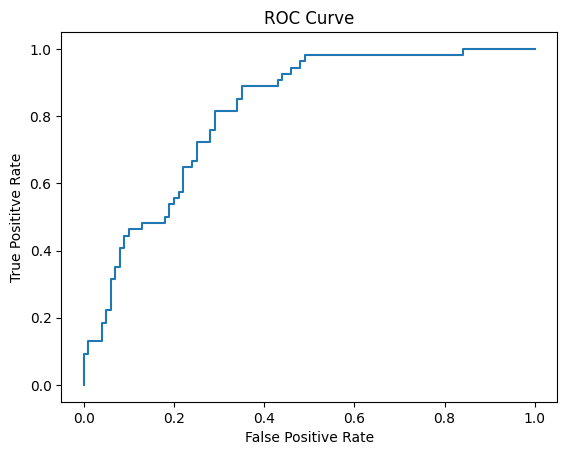

In [266]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Posititve Rate")
plt.title("ROC Curve")
plt.show()

# Normal Logistic 

In [271]:
from sklearn.linear_model import LogisticRegression

In [273]:
normal_model= LogisticRegression(max_iter=1000)
normal_model.fit(X_train, y_train)
normal_pred= normal_model.predict(X_test)
normal_acc= normal_model.score(X_test, y_test)
print("Normal Logistic Accuracy:", normal_acc)

Normal Logistic Accuracy: 0.7077922077922078


In [274]:
print("Balanced Logistic Accuracy:", model.score(X_test, y_test))

Balanced Logistic Accuracy: 0.7337662337662337


## Final Conclusion:
- The dataset was preprocessed by handling missing values.
- Features were scaled and categorial variables encoded.
- Logistic Regression model was trained.
- Balanced Logistic Regression improved performance.
- Final Accuracy: ~0.77
- ROC-AUC Score: ~0.81